In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import calendar
import time
import timeit
from math import exp
plt.style.use('ggplot')
start_time = dt.datetime.now()
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

In [2]:
%%time
data=pd.read_csv('final_cleaned_data.csv')
data.shape

CPU times: user 61.6 ms, sys: 12.6 ms, total: 74.1 ms
Wall time: 74.9 ms


(96397, 10)

# Day of the week 

In [3]:
data.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118,P,3.62,0
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803,P,31.42,0
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706,P,178.49,0
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118,P,3.62,0
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118,P,3.62,0


In [4]:
data['Date']=pd.to_datetime(data['Date'])
data['Merch description'] = data['Merch description'].str.upper()
data['Merch zip'] = data['Merch zip'].astype('int64') 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96397 entries, 0 to 96396
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Recnum             96397 non-null  int64         
 1   Cardnum            96397 non-null  int64         
 2   Date               96397 non-null  datetime64[ns]
 3   Merchnum           96397 non-null  object        
 4   Merch description  96397 non-null  object        
 5   Merch state        96397 non-null  object        
 6   Merch zip          96397 non-null  int64         
 7   Transtype          96397 non-null  object        
 8   Amount             96397 non-null  float64       
 9   Fraud              96397 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 7.4+ MB


In [6]:
data.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118,P,3.62,0
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803,P,31.42,0
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706,P,178.49,0
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118,P,3.62,0
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118,P,3.62,0


In [7]:
data['Dow']=data.Date.apply(lambda x: calendar.day_name[x.weekday()])

In [8]:
# Separate the OOT
train_test=data[data.Date<'2010-11-01']

In [9]:
#Statistical Smoothing

c=3;nmid=15;y_avg=train_test['Fraud'].mean()
y_dow=train_test.groupby('Dow')['Fraud'].mean()
num=train_test.groupby('Dow').size()
y_dow_smooth=y_avg+(y_dow-y_avg)/(1+np.exp(-(num-nmid)/c))
#data['Dow_risk']=data.Dow.map(y_dow_smooth)

In [10]:
# delete files that we don't need any more to free up memory
del train_test

In [11]:
y_dow=y_dow.reset_index()
cats=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
y_dow['Dow']=pd.Categorical(y_dow['Dow'],categories=cats,ordered=True)
y_dow=y_dow.sort_values('Dow')
y_dow=y_dow.set_index('Dow')

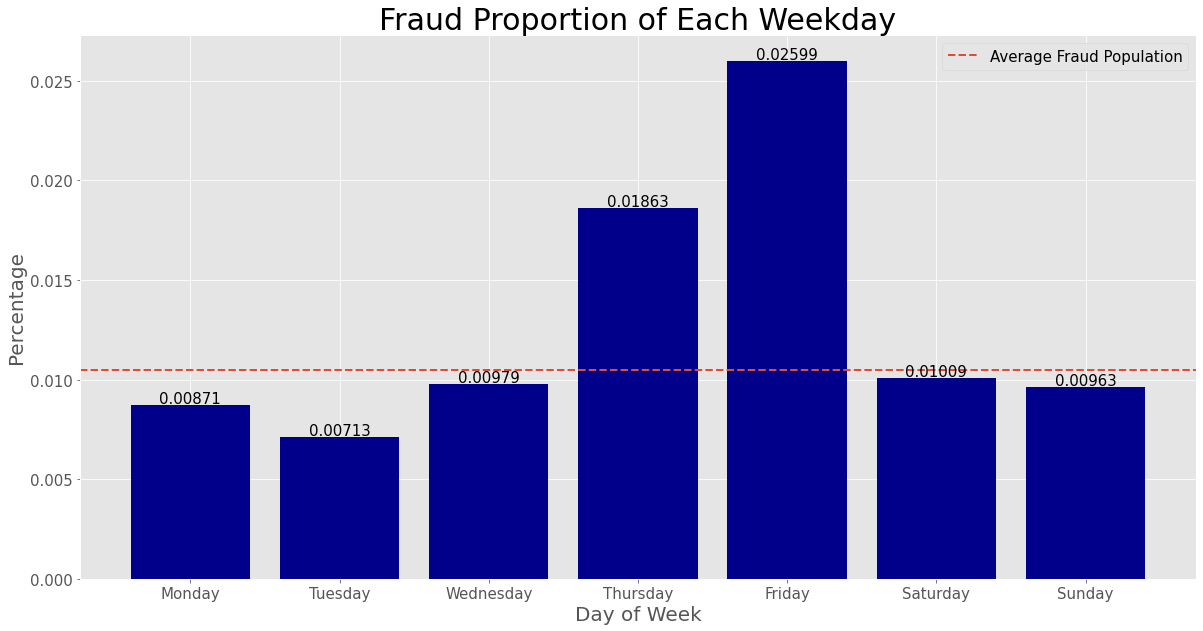

In [12]:
#plot
plt.style.use('ggplot')
fig,ax=plt.subplots(figsize=(20,10))
plt.bar(data=y_dow,x=y_dow.index,height='Fraud',color='darkblue')
#ax.set_ylim(bottom=.013)

ax.axhline(y=y_avg,ls='--',lw=2, label ='Average Fraud Population')

for i,v in enumerate(y_dow.index):
    ax.text(v,y_dow.loc[v,'Fraud']+0.0001,round(y_dow.loc[v,'Fraud'],5),horizontalalignment='center',fontsize=15)


    
plt.legend(['Average Fraud Population'],fontsize= 15)
plt.xlabel("Day of Week",fontsize=20)
plt.ylabel("Percentage",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Fraud Proportion of Each Weekday",fontsize=30)

plt.savefig('risktable.png')
plt.show()


In [13]:
df = data.copy()
print(df.shape)
df.info()

(96397, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96397 entries, 0 to 96396
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Recnum             96397 non-null  int64         
 1   Cardnum            96397 non-null  int64         
 2   Date               96397 non-null  datetime64[ns]
 3   Merchnum           96397 non-null  object        
 4   Merch description  96397 non-null  object        
 5   Merch state        96397 non-null  object        
 6   Merch zip          96397 non-null  int64         
 7   Transtype          96397 non-null  object        
 8   Amount             96397 non-null  float64       
 9   Fraud              96397 non-null  int64         
 10  Dow                96397 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 8.1+ MB


In [14]:
start_convert = pd.Timestamp.now()
# Select all columns except Date, Fraud and Amount
cols = df.columns.difference(['Date', 'Fraud', 'Amount','Recnum']) 
df[cols] = df[cols].astype(str)

print('convert time', pd.Timestamp.now() - start_convert)
df.dtypes

convert time 0 days 00:00:00.060981


Recnum                        int64
Cardnum                      object
Date                 datetime64[ns]
Merchnum                     object
Merch description            object
Merch state                  object
Merch zip                    object
Transtype                    object
Amount                      float64
Fraud                         int64
Dow                          object
dtype: object

In [15]:
df['merchnum_cardnum'] =  df['Merchnum'] + df['Cardnum'] 
df['merchzip_cardnum'] = df['Merch zip']+ df['Cardnum'] 
df['merchzip_merchnum']=df['Merch zip']+df['Merchnum'] 
df['merchstate_Cardnum'] = df['Merch state']+ df['Cardnum'] 
df['merchstate_merchnum']=df['Merch state']+df['Merchnum']

df['merchdesc_cardnum']=  df['Merch description']+ df['Cardnum'] 
df['merchnum_merchdesc']=df['Merchnum'] + df['Merch description']
df['merchnum_cardnum_merchdesc']=df['Merchnum'] +df['Cardnum']+  df['Merch description']
df['merchnum_cardnum_merchstate'] = df['Merchnum'] + df['Cardnum'] + df['Merch state']
df['merchnum_cardnum_merchzip'] = df['Merchnum'] + df['Cardnum'] + df['Merch zip']

df['merchnum_cardnum_merchdesc_merchstate'] = df['Merchnum'] + df['Cardnum'] + df['Merch description'] + df['Merch state']
df['merchnum_cardnum_merchdesc_merchzip'] = df['Merchnum'] + df['Cardnum'] + df['Merch description'] + df['Merch zip']

#df['merchnum_cardnum_merchdesc_merchstate_merchzip'] = df['Merchnum'] + df['Cardnum'] + df['Merch description'] + df['Merch state']+ df['Merch zip']

In [16]:
df.columns

Index(['Recnum', 'Cardnum', 'Date', 'Merchnum', 'Merch description',
       'Merch state', 'Merch zip', 'Transtype', 'Amount', 'Fraud', 'Dow',
       'merchnum_cardnum', 'merchzip_cardnum', 'merchzip_merchnum',
       'merchstate_Cardnum', 'merchstate_merchnum', 'merchdesc_cardnum',
       'merchnum_merchdesc', 'merchnum_cardnum_merchdesc',
       'merchnum_cardnum_merchstate', 'merchnum_cardnum_merchzip',
       'merchnum_cardnum_merchdesc_merchstate',
       'merchnum_cardnum_merchdesc_merchzip'],
      dtype='object')

In [18]:
attribute_list=list(df.iloc[:,np.r_[1,3,12,13,14,16,17,18,19,20,21,22]].columns)
attribute_list

['Cardnum',
 'Merchnum',
 'merchzip_cardnum',
 'merchzip_merchnum',
 'merchstate_Cardnum',
 'merchdesc_cardnum',
 'merchnum_merchdesc',
 'merchnum_cardnum_merchdesc',
 'merchnum_cardnum_merchstate',
 'merchnum_cardnum_merchzip',
 'merchnum_cardnum_merchdesc_merchstate',
 'merchnum_cardnum_merchdesc_merchzip']

In [19]:
len(attribute_list)

12

In [20]:
df.shape

(96397, 23)

In [21]:
df.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,...,merchzip_merchnum,merchstate_Cardnum,merchstate_merchnum,merchdesc_cardnum,merchnum_merchdesc,merchnum_cardnum_merchdesc,merchnum_cardnum_merchstate,merchnum_cardnum_merchzip,merchnum_cardnum_merchdesc_merchstate,merchnum_cardnum_merchdesc_merchzip
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118,P,3.62,0,...,381185509006296254,TN5142190439,TN5509006296254,FEDEX SHP 12/23/09 AB#5142190439,5509006296254FEDEX SHP 12/23/09 AB#,55090062962545142190439FEDEX SHP 12/23/09 AB#,55090062962545142190439TN,5509006296254514219043938118,55090062962545142190439FEDEX SHP 12/23/09 AB#TN,55090062962545142190439FEDEX SHP 12/23/09 AB#3...
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803,P,31.42,0,...,180361003026333,MA5142183973,MA61003026333,SERVICE MERCHANDISE #815142183973,61003026333SERVICE MERCHANDISE #81,610030263335142183973SERVICE MERCHANDISE #81,610030263335142183973MA,6100302633351421839731803,610030263335142183973SERVICE MERCHANDISE #81MA,610030263335142183973SERVICE MERCHANDISE #811803
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706,P,178.49,0,...,207064503082993600,MD5142131721,MD4503082993600,OFFICE DEPOT #1915142131721,4503082993600OFFICE DEPOT #191,45030829936005142131721OFFICE DEPOT #191,45030829936005142131721MD,4503082993600514213172120706,45030829936005142131721OFFICE DEPOT #191MD,45030829936005142131721OFFICE DEPOT #19120706
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118,P,3.62,0,...,381185509006296254,TN5142148452,TN5509006296254,FEDEX SHP 12/28/09 AB#5142148452,5509006296254FEDEX SHP 12/28/09 AB#,55090062962545142148452FEDEX SHP 12/28/09 AB#,55090062962545142148452TN,5509006296254514214845238118,55090062962545142148452FEDEX SHP 12/28/09 AB#TN,55090062962545142148452FEDEX SHP 12/28/09 AB#3...
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118,P,3.62,0,...,381185509006296254,TN5142190439,TN5509006296254,FEDEX SHP 12/23/09 AB#5142190439,5509006296254FEDEX SHP 12/23/09 AB#,55090062962545142190439FEDEX SHP 12/23/09 AB#,55090062962545142190439TN,5509006296254514219043938118,55090062962545142190439FEDEX SHP 12/23/09 AB#TN,55090062962545142190439FEDEX SHP 12/23/09 AB#3...


In [22]:
df.shape

(96397, 23)

In [23]:
df1=df.copy()
final=df.copy()
df1['check_date']=df1.Date
df1['check_record']=df1.Recnum
final.shape

(96397, 23)

## Velocity/counts and days since#
# # Frequency & amount variables

In [24]:
print(final.shape)
start_len=len(final.columns)
start_len

(96397, 23)


23

In [25]:
%%time
start=timeit.default_timer()

for entity in attribute_list:
    try: print(entity,'Run time for this entity---> {}s'.format(timeit.default_timer()-st))
    except: 
        print('')
    st=timeit.default_timer()
       
# Day- since variables:

    df_l=df1[['Recnum','Date',entity]]
    df_r=df1[['check_record','check_date',entity,'Amount']]
    temp=pd.merge(df_l,df_r, left_on=entity,right_on=entity)
    temp1=temp[temp.Recnum > temp.check_record][['Recnum','Date','check_date']].groupby('Recnum')[['Date','check_date']].last()
 
    mapper = (temp1.Date - temp1.check_date).dt.days
    final[entity + '_day_since']=final.Recnum.map(mapper)
    final[entity + '_day_since'].fillna((final.Date-pd.to_datetime('2006-01-01')).dt.days,inplace =True)
    print('\n' + entity + '_day_since --->Done')
    
    
    
# # Frequency & amount variables:
    
    for time in [0,1,3,7,14,30,60]:
        temp2=temp[(temp.check_date >=(temp.Date -dt.timedelta(time))) & \
                    (temp.Recnum >=temp.check_record)] [['Recnum',entity,'Amount']]
        
        col_name =entity + '_count_' + str(time)
        mapper2 =temp2.groupby('Recnum')[entity].count()
        final[col_name]= final.Recnum.map(mapper2)
        print(col_name + '--> Done')
        final[entity +'_avg_'+ str(time)]=final.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())
        final[entity +'_max_'+ str(time)]=final.Recnum.map(temp2.groupby('Recnum')['Amount'].max())
        final[entity +'_med_'+ str(time)]=final.Recnum.map(temp2.groupby('Recnum')['Amount'].median())
        final[entity +'_total_'+ str(time)]=final.Recnum.map(temp2.groupby('Recnum')['Amount'].sum())
        final[entity +'_actual/avg_'+ str(time)]=final['Amount'] / final[entity +'_avg_'+ str(time)]
        final[entity +'_actual/max_'+ str(time)]=final['Amount'] / final[entity +'_max_'+ str(time)]
        final[entity +'_actual/med_'+ str(time)]=final['Amount'] / final[entity +'_med_'+ str(time)]
        final[entity +'_actual/total_'+ str(time)]=final['Amount'] / final[entity +'_total_'+ str(time)]
        print(entity + '_amount variables over ' + str(time) + '---> Done')
                
    del df_l
    del df_r
    del temp
    del temp1
    del temp2
    del mapper2
    
        
print('Total run time :{}mins'.format((timeit.default_timer()-st)/60))     



Cardnum_day_since --->Done
Cardnum_count_0--> Done
Cardnum_amount variables over 0---> Done
Cardnum_count_1--> Done
Cardnum_amount variables over 1---> Done
Cardnum_count_3--> Done
Cardnum_amount variables over 3---> Done
Cardnum_count_7--> Done
Cardnum_amount variables over 7---> Done
Cardnum_count_14--> Done
Cardnum_amount variables over 14---> Done
Cardnum_count_30--> Done
Cardnum_amount variables over 30---> Done
Cardnum_count_60--> Done
Cardnum_amount variables over 60---> Done
Merchnum Run time for this entity---> 4.363886542000003s

Merchnum_day_since --->Done
Merchnum_count_0--> Done
Merchnum_amount variables over 0---> Done
Merchnum_count_1--> Done
Merchnum_amount variables over 1---> Done
Merchnum_count_3--> Done
Merchnum_amount variables over 3---> Done
Merchnum_count_7--> Done
Merchnum_amount variables over 7---> Done
Merchnum_count_14--> Done
Merchnum_amount variables over 14---> Done
Merchnum_count_30--> Done
Merchnum_amount variables over 30---> Done
Merchnum_count_60-

merchnum_cardnum_merchdesc_merchzip_amount variables over 0---> Done
merchnum_cardnum_merchdesc_merchzip_count_1--> Done
merchnum_cardnum_merchdesc_merchzip_amount variables over 1---> Done
merchnum_cardnum_merchdesc_merchzip_count_3--> Done
merchnum_cardnum_merchdesc_merchzip_amount variables over 3---> Done
merchnum_cardnum_merchdesc_merchzip_count_7--> Done
merchnum_cardnum_merchdesc_merchzip_amount variables over 7---> Done
merchnum_cardnum_merchdesc_merchzip_count_14--> Done
merchnum_cardnum_merchdesc_merchzip_amount variables over 14---> Done
merchnum_cardnum_merchdesc_merchzip_count_30--> Done
merchnum_cardnum_merchdesc_merchzip_amount variables over 30---> Done
merchnum_cardnum_merchdesc_merchzip_count_60--> Done
merchnum_cardnum_merchdesc_merchzip_amount variables over 60---> Done
Total run time :0.017468588200000093mins
CPU times: user 58.7 s, sys: 26.4 s, total: 1min 25s
Wall time: 1min 20s


In [26]:
print(final.shape)
print('#new variable is',len(final.columns)-start_len)
start_len=len(final.columns)

(96397, 791)
#new variable is 768


In [27]:
%%time
start = timeit.default_timer()

# Velocity change variables
for entity in attribute_list:
    for i in ['0', '1']:
        for j in ['7', '14', '30', '60']:
            entity_count_i = final[entity + '_count_' + i]
            entity_count_j = final[entity + '_count_' + j]
            entity_total_i = final[entity + '_total_' + i]
            entity_total_j = final[entity + '_total_' + j]
            
            final[entity + '_count_' + i + '_by_' + j] = entity_count_i / entity_count_j / float(j)
            final[entity + '_total_amount_' + i + '_by_' + j] = entity_total_i / entity_total_j / float(j)

print('Run time: {}s'.format((timeit.default_timer() - start)))

Run time: 0.9792122909999819s
CPU times: user 868 ms, sys: 112 ms, total: 980 ms
Wall time: 979 ms


In [28]:
print(final.shape)
print('#new variables are',len(final.columns) - start_len)
start_len=len(final.columns)

(96397, 983)
#new variables are 192


In [29]:
final.to_csv('variable_part_1',index=False)

In [30]:
final_new=final.copy()

In [31]:
print(final_new.shape)

(96397, 983)


In [32]:
start_len=len(final_new.columns)
start_len

983

In [33]:
%%time
start = timeit.default_timer()

for entity in attribute_list:
    for i in ['0', '1']:
        for j in ['7', '14', '30', '60']:
            final_new[entity +'_vdratio_'+i] =\
            final_new[entity+'_count_'+i+'_by_'+ j]/(final[entity+'_day_since']+1)          

CPU times: user 23.4 ms, sys: 5.54 ms, total: 28.9 ms
Wall time: 28.3 ms


In [34]:
print(final_new.shape)
print('#new variables are',len(final_new.columns) - start_len)
start_len=len(final_new.columns)

(96397, 1007)
#new variables are 24


In [35]:
%%time
start = timeit.default_timer()
for entity in attribute_list:
    for field in attribute_list:
        st=timeit.default_timer()
        if entity != field:
            new_attributes= f'{entity}_{field}_nunique'
            if new_attributes not in list(final_new.columns):
                mapper3=final_new.groupby(entity)[field].nunique()
                final_new[new_attributes]=final_new[entity].map(mapper3)
        print(f'run time for entity {entity} in field {field}' + '--> Done')
        
print('total run time : {}mins'.format((timeit.default_timer()-start/60)))

run time for entity Cardnum in field Cardnum--> Done
run time for entity Cardnum in field Merchnum--> Done
run time for entity Cardnum in field merchzip_cardnum--> Done
run time for entity Cardnum in field merchzip_merchnum--> Done
run time for entity Cardnum in field merchstate_Cardnum--> Done
run time for entity Cardnum in field merchdesc_cardnum--> Done
run time for entity Cardnum in field merchnum_merchdesc--> Done
run time for entity Cardnum in field merchnum_cardnum_merchdesc--> Done
run time for entity Cardnum in field merchnum_cardnum_merchstate--> Done
run time for entity Cardnum in field merchnum_cardnum_merchzip--> Done
run time for entity Cardnum in field merchnum_cardnum_merchdesc_merchstate--> Done
run time for entity Cardnum in field merchnum_cardnum_merchdesc_merchzip--> Done
run time for entity Merchnum in field Cardnum--> Done
run time for entity Merchnum in field Merchnum--> Done
run time for entity Merchnum in field merchzip_cardnum--> Done
run time for entity Merch

run time for entity merchnum_cardnum_merchzip in field merchzip_cardnum--> Done
run time for entity merchnum_cardnum_merchzip in field merchzip_merchnum--> Done
run time for entity merchnum_cardnum_merchzip in field merchstate_Cardnum--> Done
run time for entity merchnum_cardnum_merchzip in field merchdesc_cardnum--> Done
run time for entity merchnum_cardnum_merchzip in field merchnum_merchdesc--> Done
run time for entity merchnum_cardnum_merchzip in field merchnum_cardnum_merchdesc--> Done
run time for entity merchnum_cardnum_merchzip in field merchnum_cardnum_merchstate--> Done
run time for entity merchnum_cardnum_merchzip in field merchnum_cardnum_merchzip--> Done
run time for entity merchnum_cardnum_merchzip in field merchnum_cardnum_merchdesc_merchstate--> Done
run time for entity merchnum_cardnum_merchzip in field merchnum_cardnum_merchdesc_merchzip--> Done
run time for entity merchnum_cardnum_merchdesc_merchstate in field Cardnum--> Done
run time for entity merchnum_cardnum_merc

This code block iterates over every pair of entities in the dataset and calculates the number of unique values in the field of the second entity for each value of the first entity. This is done using the nunique() method in pandas. The resulting values are stored in a new column with a name that reflects the two entities being compared.

The loop prints the run time for each entity and field combination to monitor progress. Finally, it prints the total run time in minutes.

In [36]:
print(final_new.shape)
print('#new variables are',len(final_new.columns) - start_len)
start_len=len(final_new.columns)

(96397, 1138)
#new variables are 131


In [38]:
df2=data.copy()
df2['check_date']=df2.Date
df2['check_recnum']=df2.Recnum
df_2=df2[['Recnum','Date','Amount','Cardnum','Merchnum']]
df_s=df2[['check_recnum','check_date','Amount','Cardnum','Merchnum']]
temp2=pd.merge(df_2,df_s,left_on='Cardnum',right_on='Cardnum')


groupers=['Cardnum']
for grouper in groupers:
    for i in [0,1]:
        for j in [3,7,14,30]:
            numerator_df=temp2[(temp2.check_date>=(temp2.Date-dt.timedelta(i)))
                              & (temp2.Recnum>=temp2.check_recnum)]
            
            denominator_df=temp2[(temp2.check_date>=(temp2.Date-dt.timedelta(j)))
                              & (temp2.Recnum>=temp2.check_recnum)]
            
            
            
            numerator=numerator_df.groupby(grouper)['Recnum'].count()/j

            denominator=denominator_df.groupby(grouper)['Recnum'].count()/j
            
            colname='relative_velocity_count_by_'+ grouper +'_'+ str(i) +'_days_over_'+ str(j)
            final_new[colname]=final_new[grouper].map(numerator)/final_new[grouper].map(denominator)
            

In [39]:
print(final_new.shape)
print('#new variables are',len(final_new.columns) - start_len)
start_len=len(final_new.columns)

(96397, 1146)
#new variables are 8


In [40]:
attribute_list

['Cardnum',
 'Merchnum',
 'merchzip_cardnum',
 'merchzip_merchnum',
 'merchstate_Cardnum',
 'merchdesc_cardnum',
 'merchnum_merchdesc',
 'merchnum_cardnum_merchdesc',
 'merchnum_cardnum_merchstate',
 'merchnum_cardnum_merchzip',
 'merchnum_cardnum_merchdesc_merchstate',
 'merchnum_cardnum_merchdesc_merchzip']

In [41]:
%%time
start=timeit.default_timer()

for entity in attribute_list:
    try: print(entity,'Run time for this entity---> {}s'.format(timeit.default_timer()-st))
    except: 
        print('')
    st=timeit.default_timer()
    df_l=df1[['Recnum','Date',entity,'Amount']]
    df_r=df1[['check_record','check_date',entity,'Amount']]
    temp=pd.merge(df_l,df_r, left_on=entity,right_on=entity)
    
    
    
    for time in [0,1,3,7,14,30]:
        temp2=temp[(temp.check_date >=(temp.Date - dt.timedelta(time))) & \
                    (temp.Recnum >=temp.check_record)] [['Recnum','check_record',entity,'Amount_x','Amount_y']]
        temp2['Amount_diff']=temp2['Amount_y']-temp2['Amount_x']
        
        
        col_name =entity + '_variability_avg_' + str(time)
        
        mapper2 =temp2.groupby('Recnum')['Amount_diff'].mean()
        
        final_new[col_name]= final_new.Recnum.map(mapper2)
        print(col_name+'----> Done')
        
        
        col_name =entity + '_variability_max_' + str(time)
        
        mapper2 =temp2.groupby('Recnum')['Amount_diff'].max()
        
        final_new[col_name]= final_new.Recnum.map(mapper2)
        print(col_name + '----> Done')
        
        col_name =entity + '_variability_med_' + str(time)
        
        mapper2 =temp2.groupby('Recnum')['Amount_diff'].median()
        
        final_new[col_name]= final_new.Recnum.map(mapper2)
        print(col_name + '----> Done')
        

        print(entity + ' amount variable over past ' + str(time) + '---->Done')
           
             
    del df_l
    del df_r
    del temp
    del temp2
    
        
print('Total run time :{}mins'.format((timeit.default_timer()-st)/60)) 
    

Cardnum Run time for this entity---> 353.38191900000004s
Cardnum_variability_avg_0----> Done
Cardnum_variability_max_0----> Done
Cardnum_variability_med_0----> Done
Cardnum amount variable over past 0---->Done
Cardnum_variability_avg_1----> Done
Cardnum_variability_max_1----> Done
Cardnum_variability_med_1----> Done
Cardnum amount variable over past 1---->Done
Cardnum_variability_avg_3----> Done
Cardnum_variability_max_3----> Done
Cardnum_variability_med_3----> Done
Cardnum amount variable over past 3---->Done
Cardnum_variability_avg_7----> Done
Cardnum_variability_max_7----> Done
Cardnum_variability_med_7----> Done
Cardnum amount variable over past 7---->Done
Cardnum_variability_avg_14----> Done
Cardnum_variability_max_14----> Done
Cardnum_variability_med_14----> Done
Cardnum amount variable over past 14---->Done
Cardnum_variability_avg_30----> Done
Cardnum_variability_max_30----> Done
Cardnum_variability_med_30----> Done
Cardnum amount variable over past 30---->Done
Merchnum Run time

merchnum_cardnum_merchdesc_variability_avg_0----> Done
merchnum_cardnum_merchdesc_variability_max_0----> Done
merchnum_cardnum_merchdesc_variability_med_0----> Done
merchnum_cardnum_merchdesc amount variable over past 0---->Done
merchnum_cardnum_merchdesc_variability_avg_1----> Done
merchnum_cardnum_merchdesc_variability_max_1----> Done
merchnum_cardnum_merchdesc_variability_med_1----> Done
merchnum_cardnum_merchdesc amount variable over past 1---->Done
merchnum_cardnum_merchdesc_variability_avg_3----> Done
merchnum_cardnum_merchdesc_variability_max_3----> Done
merchnum_cardnum_merchdesc_variability_med_3----> Done
merchnum_cardnum_merchdesc amount variable over past 3---->Done
merchnum_cardnum_merchdesc_variability_avg_7----> Done
merchnum_cardnum_merchdesc_variability_max_7----> Done
merchnum_cardnum_merchdesc_variability_med_7----> Done
merchnum_cardnum_merchdesc amount variable over past 7---->Done
merchnum_cardnum_merchdesc_variability_avg_14----> Done
merchnum_cardnum_merchdesc_v

In [42]:
print(final_new.shape)
print('#new variables are',len(final_new.columns) - start_len)
start_len=len(final_new.columns)

(96397, 1362)
#new variables are 216


In [43]:
final_new.to_csv('variable_part_2',index=False)

In [44]:
len(final_new.columns)

1362

In [45]:
attribute_list

['Cardnum',
 'Merchnum',
 'merchzip_cardnum',
 'merchzip_merchnum',
 'merchstate_Cardnum',
 'merchdesc_cardnum',
 'merchnum_merchdesc',
 'merchnum_cardnum_merchdesc',
 'merchnum_cardnum_merchstate',
 'merchnum_cardnum_merchzip',
 'merchnum_cardnum_merchdesc_merchstate',
 'merchnum_cardnum_merchdesc_merchzip']

# Benford Variable

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96397 entries, 0 to 96396
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Recnum             96397 non-null  int64         
 1   Cardnum            96397 non-null  int64         
 2   Date               96397 non-null  datetime64[ns]
 3   Merchnum           96397 non-null  object        
 4   Merch description  96397 non-null  object        
 5   Merch state        96397 non-null  object        
 6   Merch zip          96397 non-null  int64         
 7   Transtype          96397 non-null  object        
 8   Amount             96397 non-null  float64       
 9   Fraud              96397 non-null  int64         
 10  Dow                96397 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 8.1+ MB


In [47]:
bf= data.copy()

In [48]:
bf.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,Dow
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118,P,3.62,0,Friday
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803,P,31.42,0,Friday
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706,P,178.49,0,Friday
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118,P,3.62,0,Friday
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118,P,3.62,0,Friday


In [49]:
bf['amount_100']=(bf['Amount']*100).astype(str)
bf['first_digit'] = bf['amount_100'].str[0]
dropfedex= bf[bf['Merch description'].str.contains('FEDEX')]
droplist=dropfedex.index.tolist()
bf1=bf.drop(droplist)
bf1['bin']=bf1['first_digit'].apply(lambda x: "low" if x=="1" else ("low" if x==2 else "high")) 

In [50]:
bf1.shape

(84622, 14)

In [51]:
bf1.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,Dow,amount_100,first_digit,bin
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803,P,31.42,0,Friday,3142.0,3,high
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706,P,178.49,0,Friday,17849.0,1,low
7,8,5142191182,2010-01-01,6098208200062,MIAMI COMPUTER SUPPLY,OH,45429,P,230.32,0,Friday,23032.0,2,high
8,9,5142258629,2010-01-01,602608969534,FISHER SCI ATL,GA,30091,P,62.11,0,Friday,6211.0,6,high
13,14,5142124791,2010-01-01,5725000466504,CDW*GOVERNMENT INC,IL,60061,P,106.89,0,Friday,10689.0,1,low


In [52]:
bf1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84622 entries, 1 to 96396
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Recnum             84622 non-null  int64         
 1   Cardnum            84622 non-null  int64         
 2   Date               84622 non-null  datetime64[ns]
 3   Merchnum           84622 non-null  object        
 4   Merch description  84622 non-null  object        
 5   Merch state        84622 non-null  object        
 6   Merch zip          84622 non-null  int64         
 7   Transtype          84622 non-null  object        
 8   Amount             84622 non-null  float64       
 9   Fraud              84622 non-null  int64         
 10  Dow                84622 non-null  object        
 11  amount_100         84622 non-null  object        
 12  first_digit        84622 non-null  object        
 13  bin                84622 non-null  object        
dtypes: dat

In [53]:
card_bf=bf1.groupby(['Cardnum','bin']).agg({'bin' : ['count']}).reset_index()
card_bf.columns=['Cardnum','bin','count']
card_bf= card_bf.pivot_table(index='Cardnum',columns='bin',values='count',aggfunc='sum').reset_index()
card_bf.columns=['Cardnum','n_high','n_low']
card_bf=card_bf.fillna(1)

In [54]:
card_bf.head()

,Cardnum,n_high,n_low
0,5142110002,1.0,1.0
1,5142110081,4.0,1.0
2,5142110313,1.0,2.0
3,5142110402,10.0,1.0
4,5142110434,1.0,1.0


In [55]:
# calculating R, 1/R , U n, t, U_smoothed
c=3
n_mid=15
card_bf['R']=(1.096 * card_bf['n_low']/card_bf['n_high'])
card_bf['1/R']=(1/card_bf['R'])
card_bf['U']=list(map(lambda x, y : max(x,y),card_bf['R'],card_bf['1/R']))
card_bf['n']=card_bf['n_high'] + card_bf['n_low']
card_bf['t']=((card_bf['n']-n_mid)/c)

card_bf['U_smoothed']=list(map(lambda x,y : (1+ (x-1)/(1 + exp(-y))),card_bf['U'],card_bf['t']))
card_bf['U_smoothed']=card_bf['U_smoothed']

In [56]:
card_bf.head()

,Cardnum,n_high,n_low,R,1/R,U,n,t,U_smoothed
0,5142110002,1.0,1.0,1.0960,0.912409,1.096000,2.0,-4.333333,1.001244
1,5142110081,4.0,1.0,0.2740,3.649635,3.649635,5.0,-3.333333,1.091267
2,5142110313,1.0,2.0,2.1920,0.456204,2.192000,3.0,-4.000000,1.021440
3,5142110402,10.0,1.0,0.1096,9.124088,9.124088,11.0,-1.333333,2.694754
4,5142110434,1.0,1.0,1.0960,0.912409,1.096000,2.0,-4.333333,1.001244


In [57]:
bf1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84622 entries, 1 to 96396
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Recnum             84622 non-null  int64         
 1   Cardnum            84622 non-null  int64         
 2   Date               84622 non-null  datetime64[ns]
 3   Merchnum           84622 non-null  object        
 4   Merch description  84622 non-null  object        
 5   Merch state        84622 non-null  object        
 6   Merch zip          84622 non-null  int64         
 7   Transtype          84622 non-null  object        
 8   Amount             84622 non-null  float64       
 9   Fraud              84622 non-null  int64         
 10  Dow                84622 non-null  object        
 11  amount_100         84622 non-null  object        
 12  first_digit        84622 non-null  object        
 13  bin                84622 non-null  object        
dtypes: dat

In [58]:
merch_bf=bf1.groupby(['Merchnum','bin']).agg({'bin' : ['count']}).reset_index()
merch_bf.columns=['Merchnum','bin','count']
merch_bf= merch_bf.pivot_table(index='Merchnum',columns='bin',values= 'count',aggfunc='sum').reset_index()
merch_bf.columns=['Merchnum','n_high','n_low']
merch_bf=merch_bf.fillna(1)

merch_bf.head()

,Merchnum,n_high,n_low
0,003100006NOT6,1.0,1.0
1,004740006ABC6,1.0,1.0
2,005590006PNB6,1.0,1.0
3,014430619 14,1.0,1.0
4,014938913 51,1.0,1.0


In [59]:
# calculating R, 1/R , U n, t, U_smoothed
c=3
n_mid=15
merch_bf['R']=(1.096 * merch_bf['n_low']/merch_bf['n_high'])
merch_bf['1/R']=(1/merch_bf['R'])
merch_bf['U']=list(map(lambda x, y : max(x,y),merch_bf['R'],merch_bf['1/R']))
merch_bf['n']=merch_bf['n_high'] + merch_bf['n_low']
merch_bf['t']=((merch_bf['n']-n_mid)/c)

merch_bf['U_smoothed']=list(map(lambda x,y : (1+ (x-1)/(1 + exp(-y))),merch_bf['U'],merch_bf['t']))
merch_bf['U_smoothed']=merch_bf['U_smoothed']

In [60]:
merch_bf.head()

,Merchnum,n_high,n_low,R,1/R,U,n,t,U_smoothed
0,003100006NOT6,1.0,1.0,1.096,0.912409,1.096,2.0,-4.333333,1.001244
1,004740006ABC6,1.0,1.0,1.096,0.912409,1.096,2.0,-4.333333,1.001244
2,005590006PNB6,1.0,1.0,1.096,0.912409,1.096,2.0,-4.333333,1.001244
3,014430619 14,1.0,1.0,1.096,0.912409,1.096,2.0,-4.333333,1.001244
4,014938913 51,1.0,1.0,1.096,0.912409,1.096,2.0,-4.333333,1.001244


In [61]:
card_bf['Cardnum']=card_bf['Cardnum'].apply(str)

In [62]:
card_bf.set_index('Cardnum',inplace =True)
card_Ustar=pd.DataFrame(card_bf['U_smoothed'])
card_Ustar.sort_values(['U_smoothed'],ascending=False).head(3)

,U_smoothed
Cardnum,
5142194617,33.743794
5142240823,22.266612
5142176413,14.740518


In [63]:
merch_bf['Merchnum']=merch_bf['Merchnum'].apply(str)

In [64]:
merch_bf.set_index('Merchnum',inplace =True)
merch_Ustar=pd.DataFrame(merch_bf['U_smoothed'])
merch_Ustar.sort_values(['U_smoothed'],ascending=False).head(3)

,U_smoothed
Merchnum,
991808369338,165.145985
881107835,87.591241
993620810220,72.992701


#  Remove duplicate columns

In [65]:
final_new.set_index('Recnum',inplace=True)

In [66]:
%%time
print(final_new.shape)
final_new=final_new.T.drop_duplicates().T
final_new.shape

(96397, 1361)
CPU times: user 30.6 s, sys: 4.85 s, total: 35.5 s
Wall time: 35.7 s


(96397, 1250)

In [67]:
final_new.columns.values.tolist()

['Cardnum',
 'Date',
 'Merchnum',
 'Merch description',
 'Merch state',
 'Merch zip',
 'Transtype',
 'Amount',
 'Fraud',
 'Dow',
 'merchnum_cardnum',
 'merchzip_cardnum',
 'merchzip_merchnum',
 'merchstate_Cardnum',
 'merchstate_merchnum',
 'merchdesc_cardnum',
 'merchnum_merchdesc',
 'merchnum_cardnum_merchdesc',
 'merchnum_cardnum_merchstate',
 'merchnum_cardnum_merchzip',
 'merchnum_cardnum_merchdesc_merchstate',
 'merchnum_cardnum_merchdesc_merchzip',
 'Cardnum_day_since',
 'Cardnum_count_0',
 'Cardnum_avg_0',
 'Cardnum_max_0',
 'Cardnum_med_0',
 'Cardnum_total_0',
 'Cardnum_actual/avg_0',
 'Cardnum_actual/max_0',
 'Cardnum_actual/med_0',
 'Cardnum_actual/total_0',
 'Cardnum_count_1',
 'Cardnum_avg_1',
 'Cardnum_max_1',
 'Cardnum_med_1',
 'Cardnum_total_1',
 'Cardnum_actual/avg_1',
 'Cardnum_actual/max_1',
 'Cardnum_actual/med_1',
 'Cardnum_actual/total_1',
 'Cardnum_count_3',
 'Cardnum_avg_3',
 'Cardnum_max_3',
 'Cardnum_med_3',
 'Cardnum_total_3',
 'Cardnum_actual/avg_3',
 'Cardn

In [68]:
len(final_new.columns)

1250

In [69]:
final_vars =final_new.iloc[:,np.r_[8,10,19:len(final_new.columns)]]

In [70]:
final_vars.head()

,Fraud,merchnum_cardnum,merchnum_cardnum_merchzip,merchnum_cardnum_merchdesc_merchstate,merchnum_cardnum_merchdesc_merchzip,Cardnum_day_since,Cardnum_count_0,Cardnum_avg_0,Cardnum_max_0,Cardnum_med_0,...,merchnum_cardnum_merchdesc_merchzip_variability_med_3,merchnum_cardnum_merchdesc_merchzip_variability_avg_7,merchnum_cardnum_merchdesc_merchzip_variability_max_7,merchnum_cardnum_merchdesc_merchzip_variability_med_7,merchnum_cardnum_merchdesc_merchzip_variability_avg_14,merchnum_cardnum_merchdesc_merchzip_variability_max_14,merchnum_cardnum_merchdesc_merchzip_variability_med_14,merchnum_cardnum_merchdesc_merchzip_variability_avg_30,merchnum_cardnum_merchdesc_merchzip_variability_max_30,merchnum_cardnum_merchdesc_merchzip_variability_med_30
Recnum,,,,,,,,,,,,,,,,,,,,,
1,0,55090062962545142190439,5509006296254514219043938118,55090062962545142190439FEDEX SHP 12/23/09 AB#TN,55090062962545142190439FEDEX SHP 12/23/09 AB#3...,1461.0,1,3.62,3.62,3.62,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,610030263335142183973,6100302633351421839731803,610030263335142183973SERVICE MERCHANDISE #81MA,610030263335142183973SERVICE MERCHANDISE #811803,1461.0,1,31.42,31.42,31.42,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,45030829936005142131721,4503082993600514213172120706,45030829936005142131721OFFICE DEPOT #191MD,45030829936005142131721OFFICE DEPOT #19120706,1461.0,1,178.49,178.49,178.49,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,55090062962545142148452,5509006296254514214845238118,55090062962545142148452FEDEX SHP 12/28/09 AB#TN,55090062962545142148452FEDEX SHP 12/28/09 AB#3...,1461.0,1,3.62,3.62,3.62,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,55090062962545142190439,5509006296254514219043938118,55090062962545142190439FEDEX SHP 12/23/09 AB#TN,55090062962545142190439FEDEX SHP 12/23/09 AB#3...,0.0,2,3.62,3.62,3.62,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
final_vars.shape

(96397, 1233)

In [72]:
final_vars.to_csv('final_vars.csv')

In [73]:
print('Duration:',pd.datetime.now()-start_time)

Duration: 0:12:30.347928


In [74]:
column_names = final_vars.columns
column_names

Index(['Fraud', 'merchnum_cardnum', 'merchnum_cardnum_merchzip',
       'merchnum_cardnum_merchdesc_merchstate',
       'merchnum_cardnum_merchdesc_merchzip', 'Cardnum_day_since',
       'Cardnum_count_0', 'Cardnum_avg_0', 'Cardnum_max_0', 'Cardnum_med_0',
       ...
       'merchnum_cardnum_merchdesc_merchzip_variability_med_3',
       'merchnum_cardnum_merchdesc_merchzip_variability_avg_7',
       'merchnum_cardnum_merchdesc_merchzip_variability_max_7',
       'merchnum_cardnum_merchdesc_merchzip_variability_med_7',
       'merchnum_cardnum_merchdesc_merchzip_variability_avg_14',
       'merchnum_cardnum_merchdesc_merchzip_variability_max_14',
       'merchnum_cardnum_merchdesc_merchzip_variability_med_14',
       'merchnum_cardnum_merchdesc_merchzip_variability_avg_30',
       'merchnum_cardnum_merchdesc_merchzip_variability_max_30',
       'merchnum_cardnum_merchdesc_merchzip_variability_med_30'],
      dtype='object', length=1233)

In [75]:
column_names = final_vars.columns.to_frame()
column_names.to_csv('column_names.csv', index=False)

In [76]:
final_vars.columns

Index(['Fraud', 'merchnum_cardnum', 'merchnum_cardnum_merchzip',
       'merchnum_cardnum_merchdesc_merchstate',
       'merchnum_cardnum_merchdesc_merchzip', 'Cardnum_day_since',
       'Cardnum_count_0', 'Cardnum_avg_0', 'Cardnum_max_0', 'Cardnum_med_0',
       ...
       'merchnum_cardnum_merchdesc_merchzip_variability_med_3',
       'merchnum_cardnum_merchdesc_merchzip_variability_avg_7',
       'merchnum_cardnum_merchdesc_merchzip_variability_max_7',
       'merchnum_cardnum_merchdesc_merchzip_variability_med_7',
       'merchnum_cardnum_merchdesc_merchzip_variability_avg_14',
       'merchnum_cardnum_merchdesc_merchzip_variability_max_14',
       'merchnum_cardnum_merchdesc_merchzip_variability_med_14',
       'merchnum_cardnum_merchdesc_merchzip_variability_avg_30',
       'merchnum_cardnum_merchdesc_merchzip_variability_max_30',
       'merchnum_cardnum_merchdesc_merchzip_variability_med_30'],
      dtype='object', length=1233)